# FEMA Disaster Cost Forecasting
#### Capstone 2 - Exploratory Data Analysis
Michael Garber


* NOTE: Please run FEMA data wrangling workbook (below) before this one to create data needed.
    * On Github 
        * > [FEMA-DataWrangling.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/ef70129c4bf06a38b13c61e1254fdb6a3105486b/femadisastercostforecasting/notebooks/FEMA-DataWrangling.ipynb)
    * OR local path
        * > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-DataWrangling.ipynb



#### EDA High-Level Steps
1. Build data profiles and tables
    - Inferential statistics
3. Explore data relationships
    - Data visualization
    - Analysis
5. Feature Selection and Engineering

Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.

#### FEMA Disaster Cost Forecasting Goals
- predict/forecast/risk assess FEMA 2025 costs
- *dependent variable will be the sum of costs that each disaster records. To be defined in step three feature selection

#### Build data profiles and tables
- summary statistics
- categorical variable counts & review
- visualize/graph columns

In [5]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from itertools import cycle

In [6]:
#Load cleaned data
femaDataClean = pd.read_csv('../data/interim/femaMasterData_clean.csv')

#opt to not numbers in scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
#display summary statistics table
femaDataClean.describe()


,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
count,5007.00,5007.00,5007.00,4756.00,4756.00,4756.00,4756.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00
mean,2503.00,2628.47,6.03,0.12,0.30,0.96,0.67,2275.11,7216293.70,4438677.67,2777616.03,48172627.25,26531442.85,18766388.81,2971906.89
std,1445.54,1608.72,2.67,0.33,0.46,0.20,0.47,27051.29,93844357.89,65528811.35,32091778.16,695180094.16,363227505.84,452898763.73,35625458.32
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-223778.80,0.00
25%,1251.50,1253.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2503.00,2508.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,84382.38,1610.00,0.00,0.00
75%,3754.50,4136.50,9.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,4708429.77,829709.07,547011.92,216657.82
max,5006.00,5544.00,10.00,1.00,1.00,1.00,1.00,774691.00,5247169458.98,3745182194.99,1501987263.99,33979180704.40,14531826835.32,26266459303.93,1677321616.37


In [8]:
#categorical variable anaylsis
#disaster name
print(femaDataClean.disasterName.value_counts())

print("\n*Too many unique values, so this field is probably best not considered a categorical variable")

disasterName
SEVERE STORMS AND FLOODING    301
SEVERE STORMS & FLOODING      273
FLOODING                      111
SEVERE WINTER STORM            96
COVID-19                       83
                             ... 
GUYMON FIRE                     1
WHITE FIRE                      1
BATES FIELD FIRE                1
EL CENIZO FIRE                  1
TORNADO & HEAVY RAINFALL        1
Name: count, Length: 2391, dtype: int64

*Too many unique values, so this field is probably best not considered a categorical variable


declarationType
Major Disaster      2841
Fire Management     1080
Emergency            623
Fire Suppression     463
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Declaration type')]

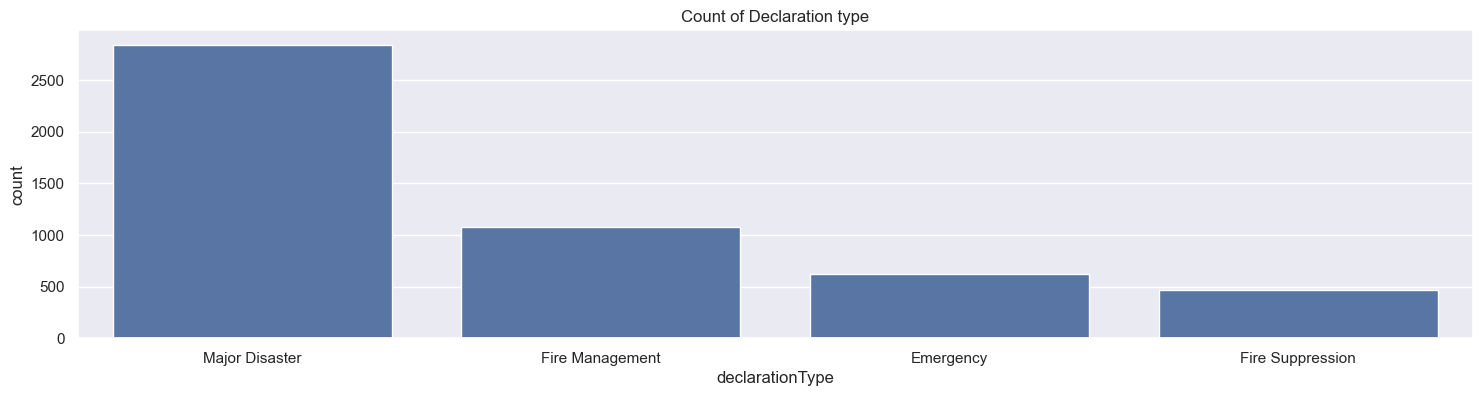

In [9]:
#categorical variable anaylsis
#declarationType
print(femaDataClean.declarationType.value_counts())

## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height

#plot declaration type count
sns.countplot(data = femaDataClean, x = 'declarationType', order=femaDataClean['declarationType'].value_counts().index).set(title='Count of Declaration type')

incidentType
Fire                   1642
Severe Storm           1096
Flood                   901
Hurricane               452
Tornado                 182
Snowstorm               171
Biological              167
Severe Ice Storm         74
Typhoon                  63
Drought                  46
Earthquake               36
Other                    34
Tropical Storm           32
Coastal Storm            31
Freezing                 18
Winter Storm             13
Mud/Landslide            12
Toxic Substances          8
Volcanic Eruption         6
Dam/Levee Break           6
Fishing Losses            6
Human Cause               4
Tsunami                   3
Terrorist                 2
Chemical                  1
Straight-Line Winds       1
Name: count, dtype: int64

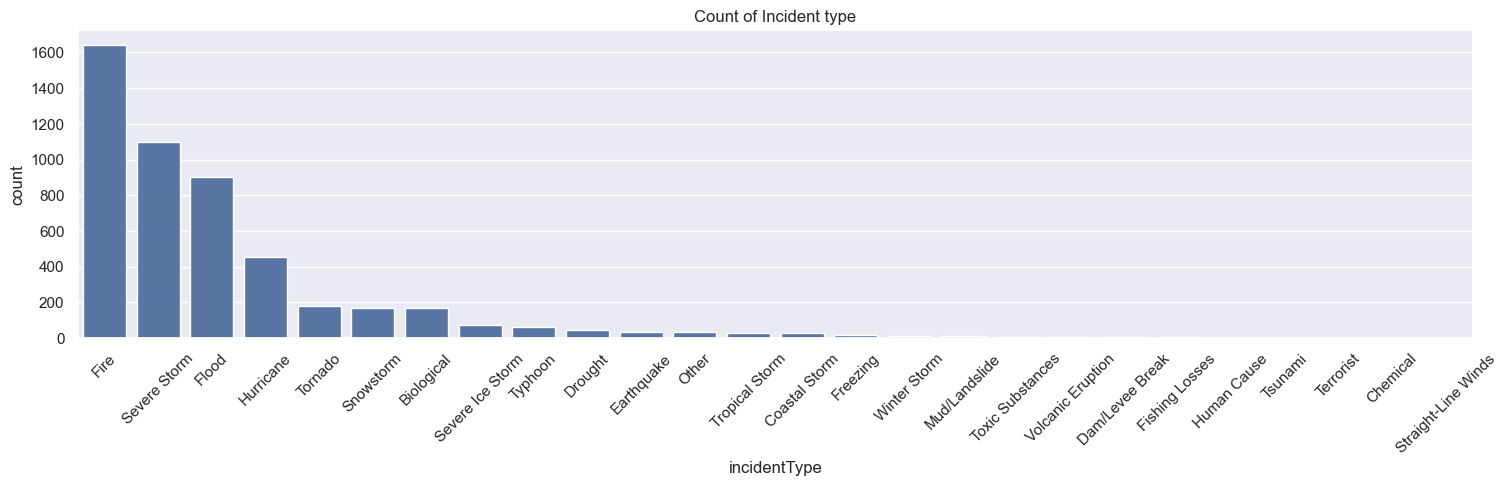

In [10]:
#categorical variable anaylsis

## define figure size
fig, ax = plt.subplots(figsize=(18, 4))
ax.tick_params(axis='x', labelrotation=45) #nice diagonal x-axis labels
sns.countplot(data = femaDataClean, x = 'incidentType', ax=ax, order=femaDataClean['incidentType'].value_counts().index).set(title='Count of Incident type')

#incident type
femaDataClean.incidentType.value_counts()

region
6     918
9     774
4     765
10    507
8     470
5     357
1     328
7     326
3     304
2     258
Name: count, dtype: int64


[Text(0.5, 1.0, 'Disasters by FEMA Region #')]

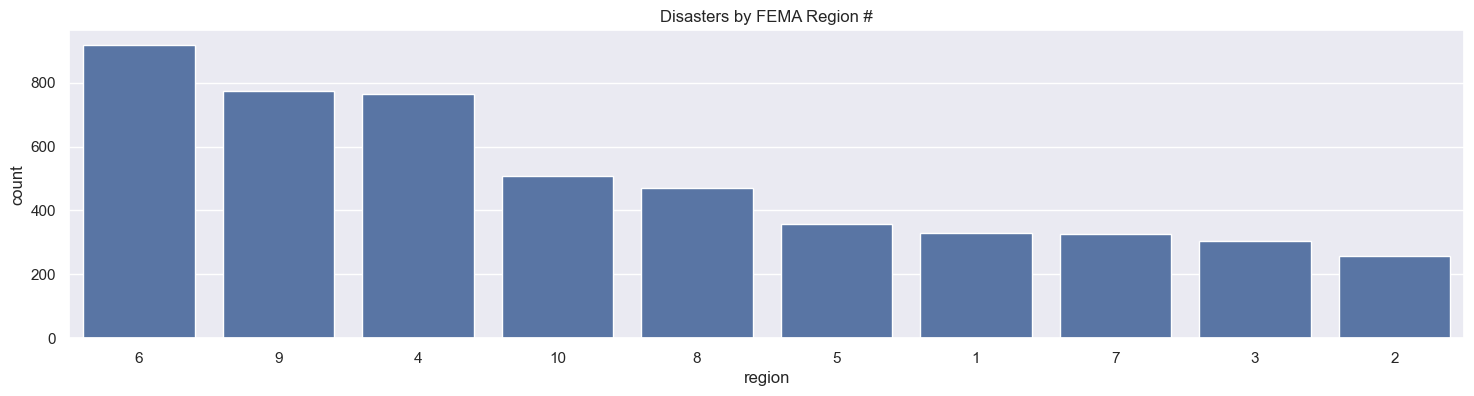

In [11]:
#categorical variable anaylsis
#region (geographic subdivided regious of the US and it's territories)
print(femaDataClean.region.value_counts())

#count plot the regions and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'region', order=femaDataClean['region'].value_counts().index).set(title='Disasters by FEMA Region #')

stateName
California                        384
Texas                             376
Oklahoma                          232
Washington                        208
Florida                           185
Oregon                            158
New Mexico                        119
Arizona                           117
New York                          117
Louisiana                         108
Nevada                            106
Colorado                          105
Montana                           104
Alabama                           102
Mississippi                        94
Tennessee                          93
South Dakota                       93
Kentucky                           90
Kansas                             88
Alaska                             84
Arkansas                           83
Nebraska                           82
West Virginia                      80
Minnesota                          79
Missouri                           79
Georgia                            78
No

[Text(0.5, 1.0, 'Disaster Count by State')]

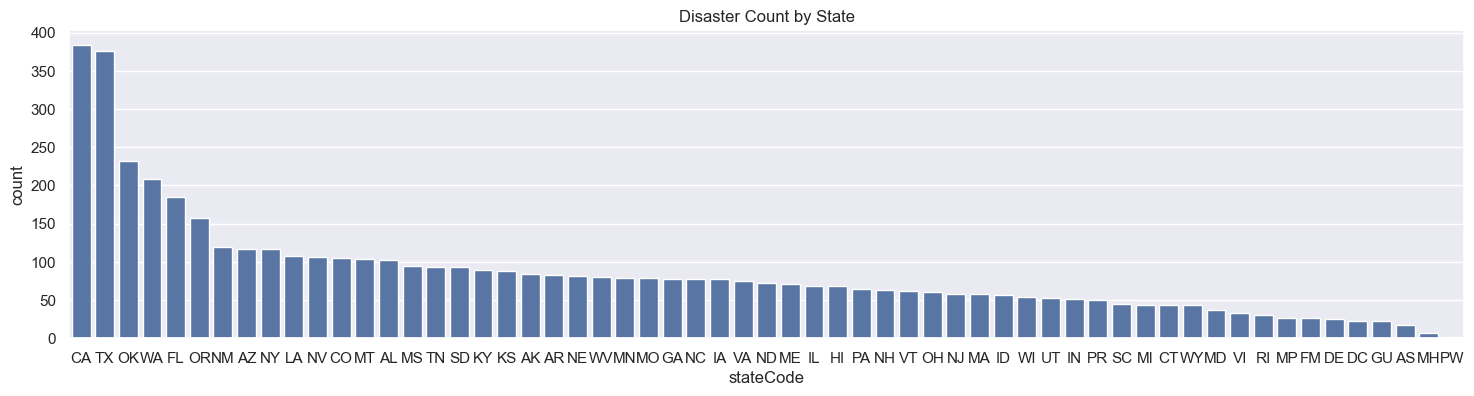

In [12]:
#categorical variable anaylsis
#state name
print(femaDataClean.stateName.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'stateCode', order=femaDataClean['stateCode'].value_counts().index).set(title='Disaster Count by State')

#### Explore Data Relationships
##### Data Visualizations
- correlation matrix
- heatmap
- https://datagy.io/python-correlation-matrix/

##### Analysis 
- calculate total cost of a disaster incident (*totalDisasterCost*)
- which incident type disasters are most frequent?
- which disasters on average are most expensize per incid?
- which region has most expensive disasters per incident?


In [14]:
#correlation matrix for fema cost amount data
selectedFields = ['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved','totalObligatedAmountHmgp']
femaCostMatrix = femaDataClean[selectedFields].corr(method='pearson')
#femaDataClean.head()

Axes(0.125,0.11;0.62x0.77)


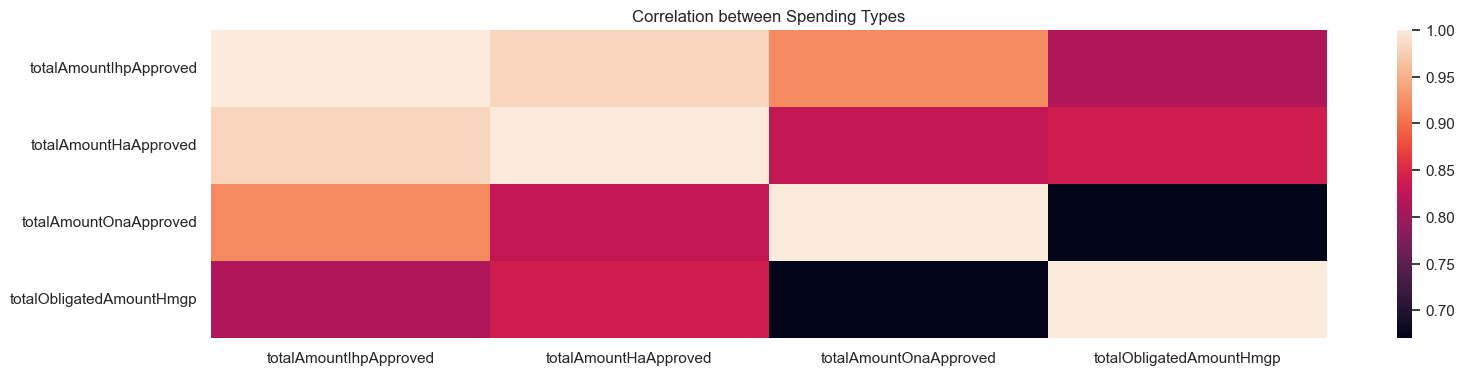

In [15]:
femaCostHeatMap = sns.heatmap(femaCostMatrix)
plt.title('Correlation between Spending Types')
print(femaCostHeatMap)

##### Observation of Heatmap
- From the correlation and heatmap we can see all cost/value amounts have a relatively high correlation with each other
- Fields "totalAmountIhpApproved" and "totalAmountHaApproved" have the strongest correlation or all

In [17]:
#calculate total cost of a disaster incident (*totalDisasterCost*)

# calc and store the total cost of totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved', 'totalObligatedAmountPa', 'totalObligatedAmountCatAb', 'totalObligatedAmountCatC2g', 'totalObligatedAmountHmgp'
femaDataCleanV2 = femaDataClean.copy()
femaDataCleanV2['totalDisasterCost'] =(femaDataCleanV2['totalAmountIhpApproved'] + femaDataCleanV2['totalAmountHaApproved'] + femaDataCleanV2['totalAmountOnaApproved'] +
    femaDataCleanV2['totalObligatedAmountPa'] + femaDataCleanV2['totalObligatedAmountCatAb'] + femaDataCleanV2['totalObligatedAmountCatC2g'] + femaDataCleanV2['totalObligatedAmountHmgp'])

femaDataCleanV2

,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y,totalDisasterCost
0,0,3623,2024-10-08T00:00:00.000Z,HURRICANE MILTON,2024-10-05T00:00:00.000Z,NaN,Emergency,FL,Florida,Hurricane,...,0.00,0.00,0.00,NaN,NaN,0.00,cad639828504f3953fef8c683f13ba38cb004035,2024-10-08T23:04:41.957Z,9c1d3526-7a6a-4205-b810-6cfb1b5d72c2,0.00
1,1,3622,2024-10-07T00:00:00.000Z,HURRICANE MILTON,2024-10-05T00:00:00.000Z,NaN,Emergency,FL,Florida,Hurricane,...,0.00,0.00,0.00,NaN,NaN,0.00,1a4b2959c17cfd8d4b272b711e818d2345bd3c81,2024-10-07T23:03:33.886Z,1ddacbae-0e8d-4e8c-9d48-df6a6769d395,0.00
2,2,4833,2024-10-04T00:00:00.000Z,WATCH FIRE,2024-07-10T00:00:00.000Z,2024-07-17T00:00:00.000Z,Major Disaster,AZ,Arizona,Fire,...,0.00,0.00,0.00,NaN,2024-11-02T00:00:00.000Z,0.00,906d28aca0fe5935e5d0989e2196eecbcd071d6d,2024-11-02T08:08:28.950Z,d6799468-adcd-489d-8585-21f6b7fa7a4e,572821.16
3,3,4826,2024-09-26T00:00:00.000Z,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",2024-07-29T00:00:00.000Z,2024-07-31T00:00:00.000Z,Major Disaster,VT,Vermont,Flood,...,0.00,0.00,0.00,NaN,2024-11-02T00:00:00.000Z,0.00,ed3d92456657705374f8c52dbe8dedb26e3460d3,2024-11-02T08:08:28.950Z,0a759ba3-62d4-4b1e-a147-07916e9083b1,2027388.16
4,4,3617,2024-09-26T00:00:00.000Z,HURRICANE HELENE,2024-09-25T00:00:00.000Z,NaN,Emergency,NC,North Carolina,Tropical Storm,...,0.00,0.00,0.00,NaN,NaN,0.00,f3d4a15b251ebcfcac81e22daac879cd12e90832,2024-09-26T23:04:54.535Z,197f2e83-17b8-453f-8a8e-4b8629aa8837,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,5002,5,1953-06-06T00:00:00.000Z,FLOODS,1953-06-06T00:00:00.000Z,1953-06-06T00:00:00.000Z,Major Disaster,MT,Montana,Flood,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
5003,5003,4,1953-06-02T00:00:00.000Z,TORNADO,1953-06-02T00:00:00.000Z,1953-06-02T00:00:00.000Z,Major Disaster,MI,Michigan,Tornado,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
5004,5004,3,1953-05-29T00:00:00.000Z,FLOOD,1953-05-29T00:00:00.000Z,1953-05-29T00:00:00.000Z,Major Disaster,LA,Louisiana,Flood,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
5005,5005,2,1953-05-15T00:00:00.000Z,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953-05-15T00:00:00.000Z,Major Disaster,TX,Texas,Tornado,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00


In [18]:
#check totalDisasterCost calculations, where the was non-zero values
femaDataCleanV2[['totalDisasterCost', 'totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved','totalObligatedAmountPa', 'totalObligatedAmountCatAb', 'totalObligatedAmountCatC2g', 'totalObligatedAmountHmgp']][femaDataCleanV2['totalDisasterCost'] != 0]

,totalDisasterCost,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
2,572821.16,286410.58,94609.82,191800.76,0.00,0.00,0.00,0.00
3,2027388.16,1013694.08,580998.75,432695.33,0.00,0.00,0.00,0.00
7,882317.36,441158.68,273876.67,167282.01,0.00,0.00,0.00,0.00
8,11466519.20,5733259.60,2076495.70,3656763.90,0.00,0.00,0.00,0.00
9,154817996.82,77408998.41,36323430.01,41085568.40,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3994,1442888.77,0.00,0.00,0.00,1411540.89,31347.88,0.00,0.00
3996,918479889.56,459239944.78,158451070.96,300788873.82,0.00,0.00,0.00,0.00
4030,6629311.84,0.00,0.00,0.00,3314655.92,3314655.92,0.00,0.00
4265,262540.00,0.00,0.00,0.00,131270.00,131270.00,0.00,0.00


In [19]:
#describe DF
femaDataCleanV2.describe()

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
count,5007.00,5007.00,5007.00,4756.00,4756.00,4756.00,4756.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00
mean,2503.00,2628.47,6.03,0.12,0.30,0.96,0.67,2275.11,7216293.70,4438677.67,2777616.03,48172627.25,26531442.85,18766388.81,2971906.89,110874953.21
std,1445.54,1608.72,2.67,0.33,0.46,0.20,0.47,27051.29,93844357.89,65528811.35,32091778.16,695180094.16,363227505.84,452898763.73,35625458.32,1481757577.89
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-223778.80,0.00,0.00
25%,1251.50,1253.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2503.00,2508.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,84382.38,1610.00,0.00,0.00,308454.78
75%,3754.50,4136.50,9.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,4708429.77,829709.07,547011.92,216657.82,9865276.16
max,5006.00,5544.00,10.00,1.00,1.00,1.00,1.00,774691.00,5247169458.98,3745182194.99,1501987263.99,33979180704.40,14531826835.32,26266459303.93,1677321616.37,68750974709.19


In [20]:
#Totalcost Values for incidentType
femaIncTypeSumDF = pd.DataFrame(femaDataCleanV2[['incidentType','totalDisasterCost']].groupby(['incidentType']).sum().sort_values('totalDisasterCost', ascending=[False])).reset_index().copy()
femaIncTypeSumDF

,incidentType,totalDisasterCost
0,Hurricane,280910735881.38
1,Biological,167903520934.06
2,Severe Storm,42249008841.90
3,Fire,24031715875.21
4,Flood,21902102942.87
5,Severe Ice Storm,5493365700.02
6,Earthquake,3355213532.68
7,Snowstorm,2978475557.89
8,Tornado,1646497215.11
9,Typhoon,1460821283.50


In [21]:
#Totalcost Values for Region
femaRegionSumDF = pd.DataFrame(femaDataCleanV2[['region','totalDisasterCost']].groupby(['region']).sum().sort_values('totalDisasterCost', ascending=[False])).reset_index().copy()
femaRegionSumDF

,region,totalDisasterCost
0,2,192773333534.62
1,6,133003644278.56
2,4,86224659738.89
3,9,43071801506.37
4,5,21086870549.01
5,3,20163984209.17
6,1,16510108608.62
7,7,16311269094.47
8,10,14968997915.54
9,8,11036221265.88


In [22]:
#Totalcost Values for stateCode
femaStateSumDF = pd.DataFrame(femaDataCleanV2[['stateCode','totalDisasterCost']].groupby(['stateCode']).sum().sort_values('totalDisasterCost', ascending=[False])).reset_index().copy()
femaStateSumDF

,stateCode,totalDisasterCost
0,PR,77594294128.05
1,NY,77113307048.17
2,LA,68884454135.36
3,TX,55864767113.44
4,FL,44976220262.05
5,CA,36906913372.70
6,VI,23496043254.03
7,NJ,14569689104.37
8,MS,11842488717.83
9,NC,9683542340.81


C:\Users\MG-Laptop\AppData\Local\Temp\ipykernel_5436\714496743.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
C:\Users\MG-Laptop\AppData\Local\Temp\ipykernel_5436\714496743.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
C:\Users\MG-Laptop\AppData\Local\Temp\ipykernel_5436\714496743.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, 'Hurricane'),
 Text(1, 0, 'Biological'),
 Text(2, 0, 'Severe Storm'),
 Text(3, 0, 'Fire'),
 Text(4, 0, 'Flood'),
 Text(5, 0, 'Severe Ice Storm'),
 Text(6, 0, 'Earthquake'),
 Text(7, 0, 'Snowstorm'),
 Text(8, 0, 'Tornado'),
 Text(9, 0, 'Typhoon'),
 Text(10, 0, 'Coastal Storm'),
 Text(11, 0, 'Tropical Storm'),
 Text(12, 0, 'Other'),
 Text(13, 0, 'Volcanic Eruption'),
 Text(14, 0, 'Mud/Landslide'),
 Text(15, 0, 'Winter Storm'),
 Text(16, 0, 'Dam/Levee Break'),
 Text(17, 0, 'Tsunami'),
 Text(18, 0, 'Terrorist'),
 Text(19, 0, 'Freezing'),
 Text(20, 0, 'Human Cause'),
 Text(21, 0, 'Toxic Substances'),
 Text(22, 0, 'Chemical'),
 Text(23, 0, 'Drought'),
 Text(24, 0, 'Straight-Line Winds'),
 Text(25, 0, 'Fishing Losses')]

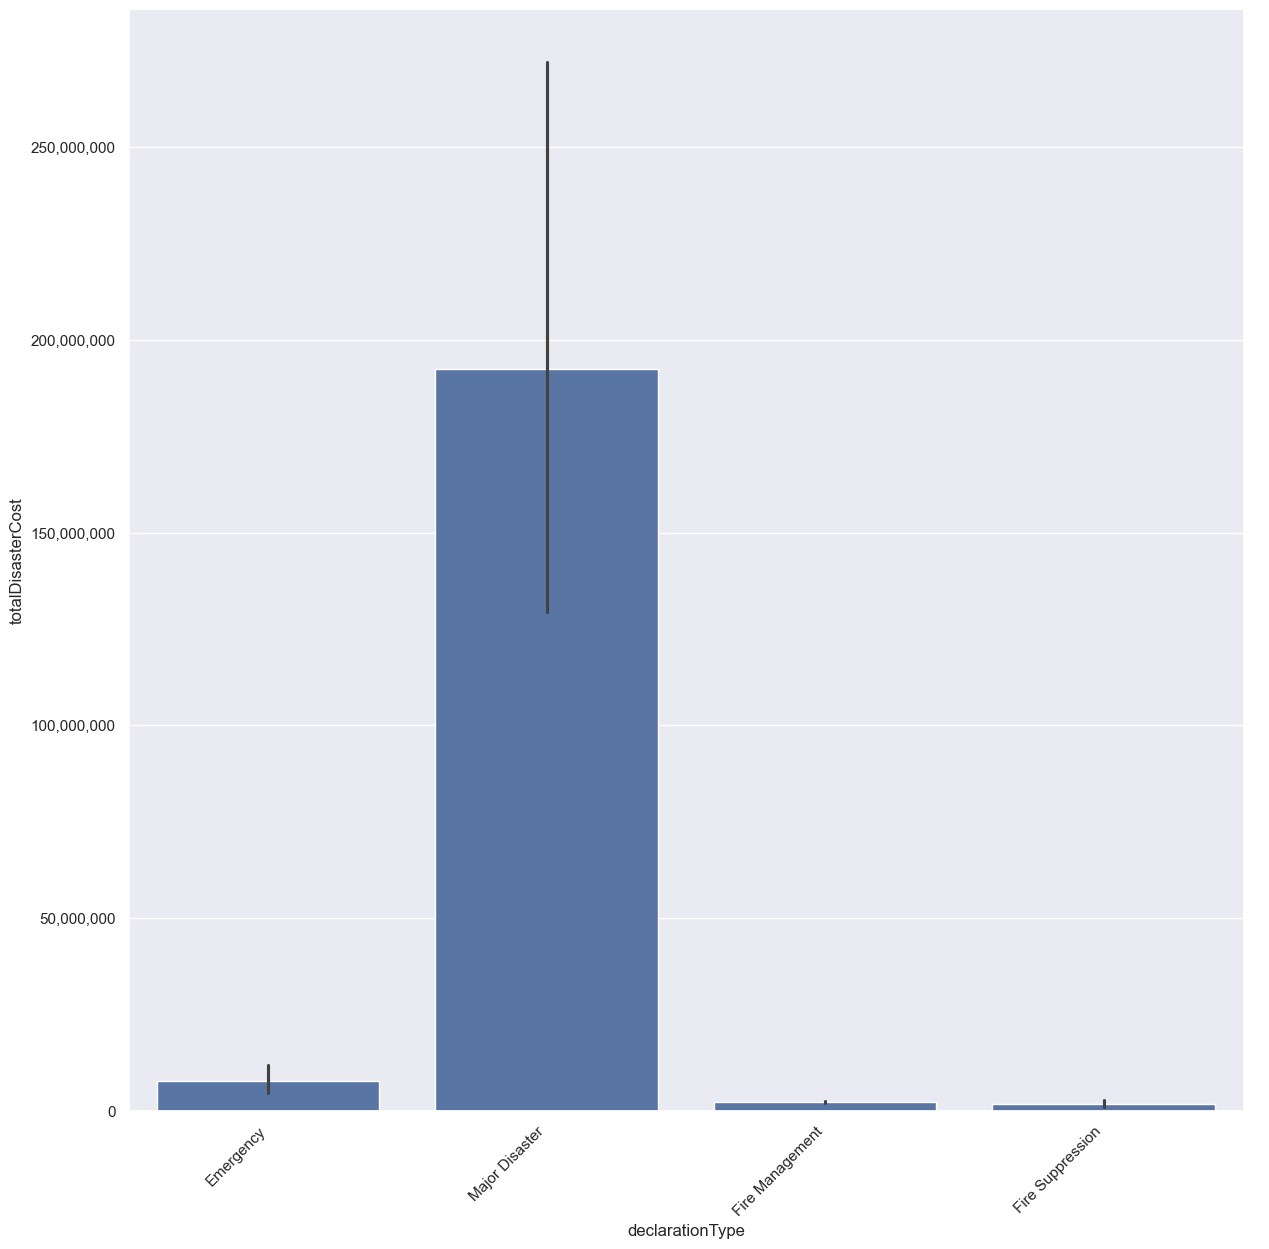

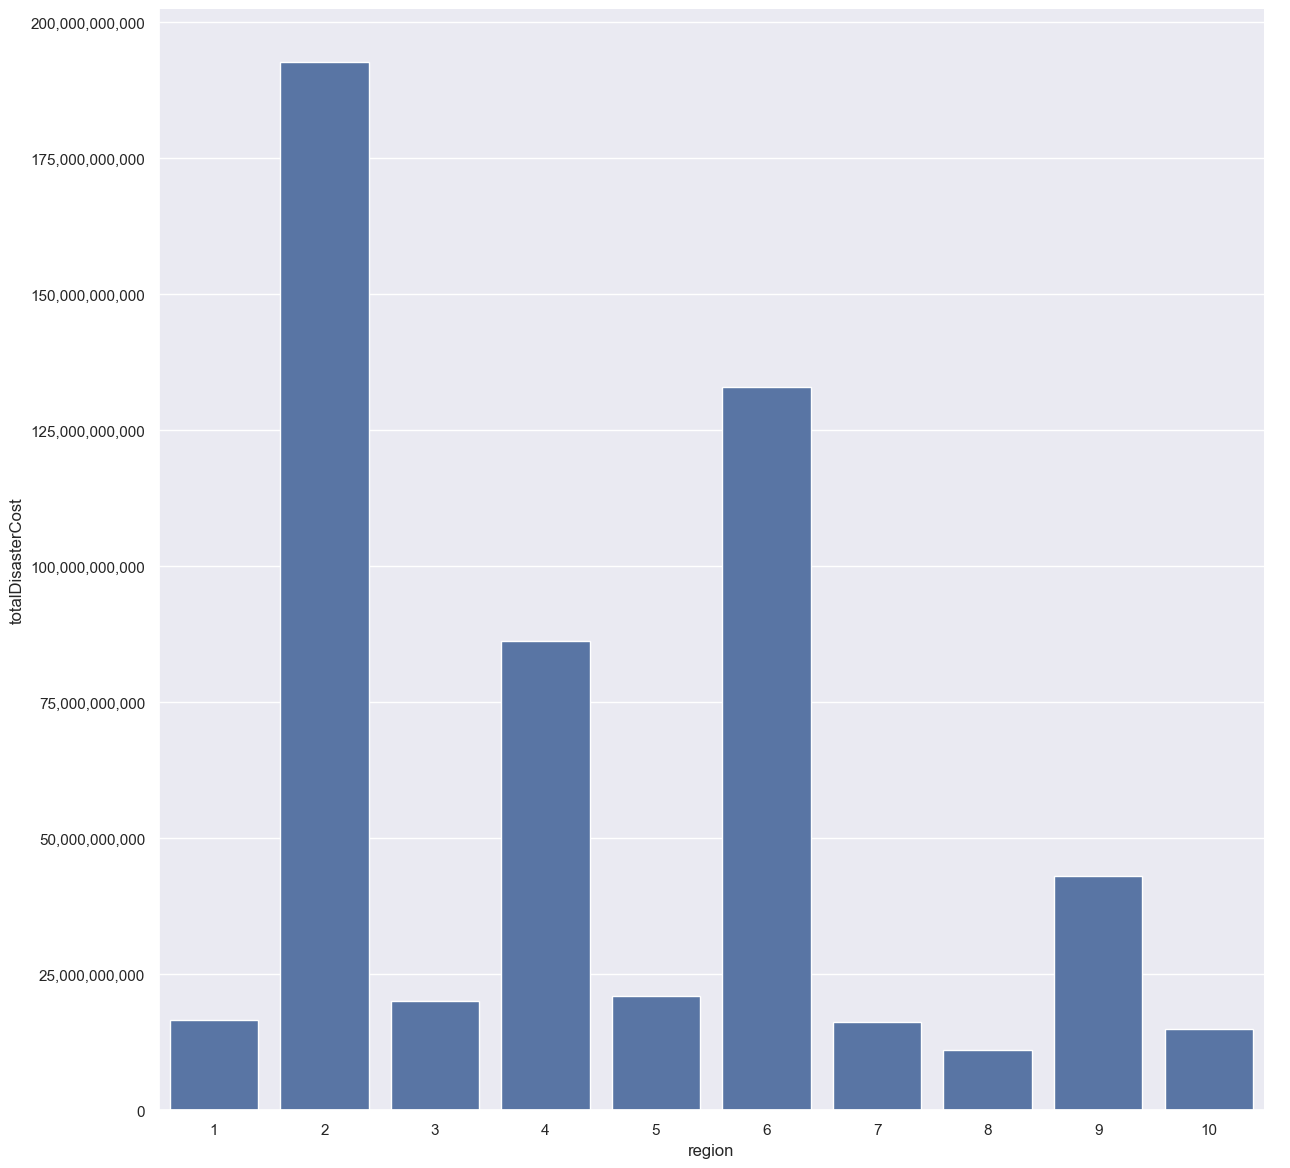

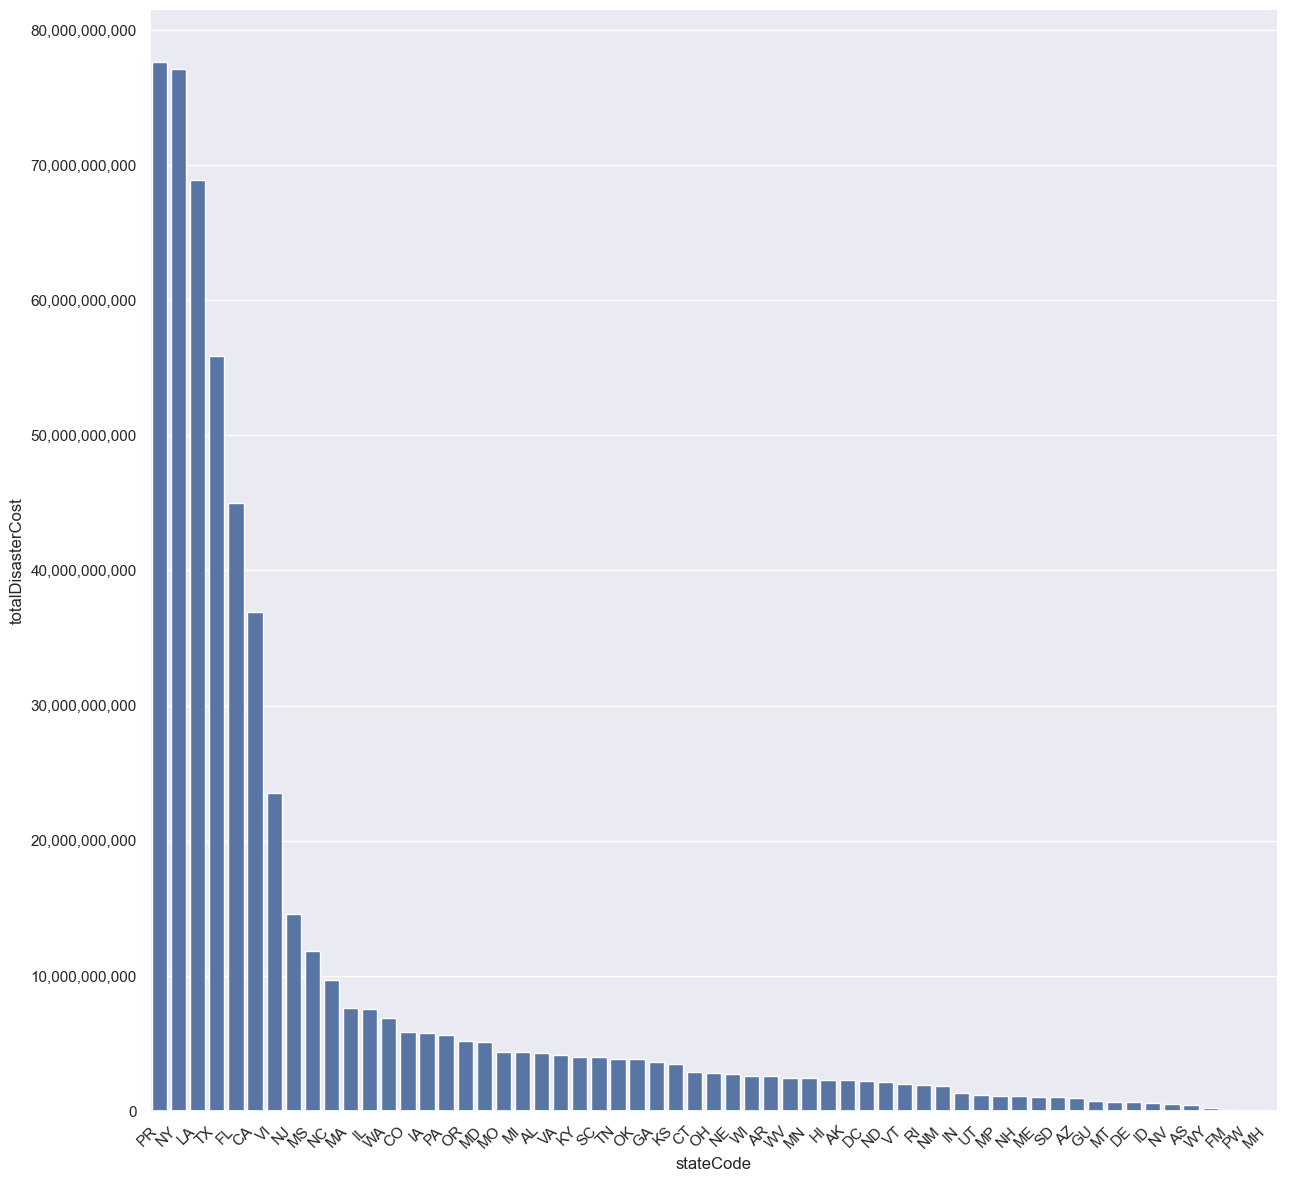

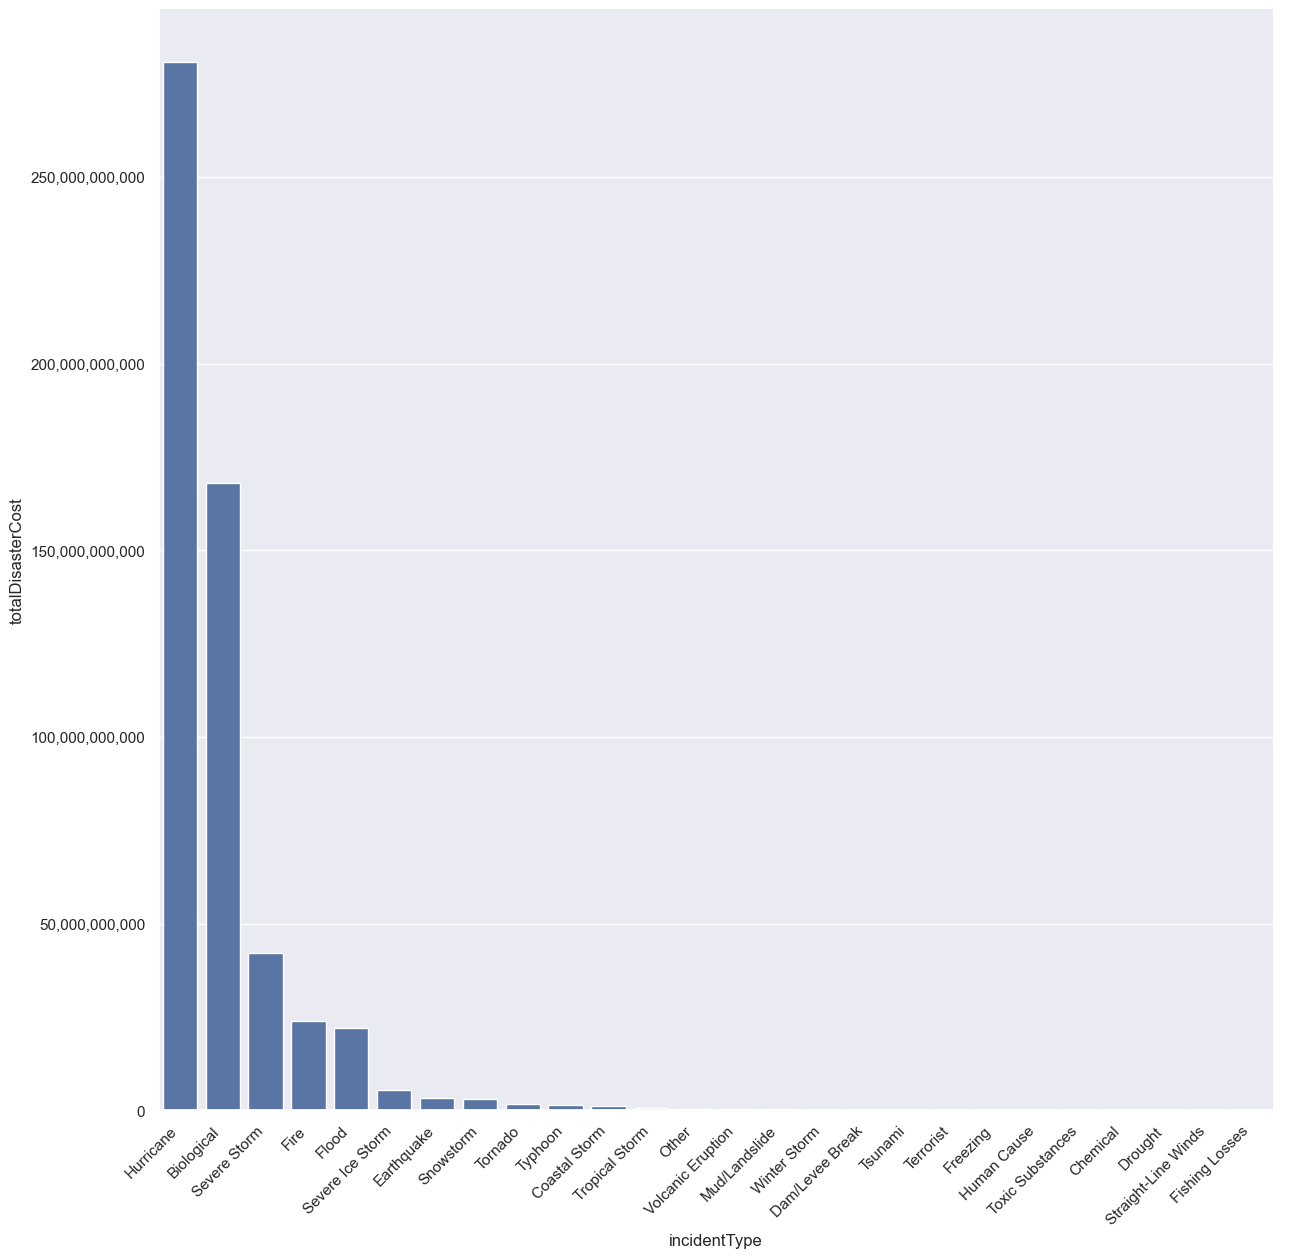

In [23]:
#plot categories vs total cost
pKind='bar' #“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
pHeight = 12
#yLogScaled = np.log10(femaDataCleanV2['totalDisasterCost'] + 1)
yLogScaled = 'totalDisasterCost'
#fig, ax = plt.subplots(figsize=(18, 4))
p1 = sns.catplot(data=femaDataCleanV2, x='declarationType', y=yLogScaled, height=pHeight, kind=pKind)
p2 = sns.catplot(data=femaRegionSumDF, x='region', y=yLogScaled, height=pHeight, kind=pKind)
p3 = sns.catplot(data=femaStateSumDF, x='stateCode', y=yLogScaled, height=pHeight, kind=pKind)
p4 = sns.catplot(data=femaIncTypeSumDF, x='incidentType', y=yLogScaled, height=pHeight, kind=pKind)

# Define formatter for number format - x,xxx,xxx,xxx
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}') 

ax1 = p1.axes.flat[0]
ax2 = p2.axes.flat[0]
ax3 = p3.axes.flat[0]
ax4 = p4.axes.flat[0]

# Apply the formatter to the y-axis
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax4.yaxis.set_major_formatter(formatter)

# Rotate X-Axis Labels Diagonally
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right") # diagonal not needed for region column
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")


##### Observations
- Declaration type is not useful (seems the categories are overlapping and poorly defined for our purposes). We can disregard going forward
- Region 2 and 6, respectively lead with the highest overall costs for disasters
- Top 5 highest cost states/territories for disasters - Puerto Rico, New York, Louisiana, Texas, Floridia
- Top 3 highest cost disasters - Hurricane, Biological, Severe Storm
- "Biological" was an unexpected standout. Is it possibly due to COVID-19?

In [25]:
#peek at COVID-related data since Biological was an unexpected standout
femaDataCleanV2[femaDataCleanV2['disasterName'].str.contains('COVID')].head()

,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y,totalDisasterCost
439,439,4591,2021-03-28T00:00:00.000Z,COVID-19 PANDEMIC,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Major Disaster,AL,Alabama,Biological,...,2438739.06,2438739.06,0.00,2024-11-02T00:00:00.000Z,NaN,0.00,97411bb8ea47cf4e5157a47b5156e61fa4db40cf,2024-11-02T04:46:20.120Z,556e1ae6-94c2-4092-ae59-26ce3089b048,4877478.12
451,451,4582,2021-02-02T00:00:00.000Z,COVID-19 PANDEMIC,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Major Disaster,AZ,Arizona,Biological,...,454701.81,454701.81,0.00,2024-11-02T00:00:00.000Z,NaN,0.00,721a20a95d5adeab2e34f96e5e10f6a5ee70a110,2024-11-02T04:46:20.120Z,b2c69d1d-5633-47b9-b9a4-a0a7fddb7ae6,909403.62
593,593,3513,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,SD,South Dakota,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,09267d4e9734669290c92e6c3ada4ec8af18a754,2023-03-18T13:22:12.883Z,926fbb3f-f556-4a5a-82a9-318db487a7b1,0.00
594,594,4545,2020-05-08T00:00:00.000Z,COVID-19 PANDEMIC,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Major Disaster,FL,Florida,Biological,...,1809645.12,1809645.12,0.00,2024-11-02T00:00:00.000Z,NaN,0.00,98db2d06335b01b93e146ddfd189be1e36f3b50e,2024-11-02T04:46:20.120Z,1222f223-644b-4b44-94c0-4da73a2c4b55,3619290.24
608,608,3526,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,SD,South Dakota,Biological,...,0.00,0.00,0.00,2024-11-02T00:00:00.000Z,NaN,0.00,48a2dec38d902a7fb4004a33b9ccd02f118bf86e,2024-11-02T04:46:20.120Z,1aaa3d8a-bdbc-4c08-8882-f45a67b3bc1c,0.00


In [26]:
femaDataCleanV2[femaDataCleanV2['disasterName'].str.contains('COVID')].describe()

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,694.19,3846.26,5.53,0.35,0.00,1.00,0.35,2987.97,19256463.54,0.00,19256463.54,488483631.52,472502118.04,0.00,5911628.36,1005410304.99
std,55.90,493.93,2.56,0.48,0.00,0.00,0.48,7274.20,47103849.31,0.00,47103849.31,1888015971.14,1814620622.92,0.00,19774691.07,3796337876.48
min,439.00,3427.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,654.50,3468.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,697.00,3510.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,738.50,4496.50,7.00,1.00,0.00,1.00,1.00,1465.00,10076246.21,0.00,10076246.21,194597651.20,187024263.26,0.00,2822522.96,440055804.00
max,780.00,4591.00,10.00,1.00,0.00,1.00,1.00,42879.00,276824891.55,0.00,276824891.55,15105205137.35,14531826835.32,0.00,178490696.94,30100340043.41


In [27]:
# which disasters on average are most expensize per incident?
femaDisasterAvgCostDF = femaDataCleanV2[['incidentType', 'totalDisasterCost']].groupby('incidentType').agg(incCount=('totalDisasterCost', 'count'), incSum=('totalDisasterCost', 'sum')).copy()
femaDisasterAvgCostDF['incAvg'] = femaDisasterAvgCostDF['incSum'] / femaDisasterAvgCostDF['incCount']
femaDisasterAvgCostDF.sort_values('incAvg', ascending=[False])

,incCount,incSum,incAvg
incidentType,,,
Biological,167,167903520934.06,1005410304.99
Hurricane,452,280910735881.38,621483928.94
Earthquake,36,3355213532.68,93200375.91
Severe Ice Storm,74,5493365700.02,74234671.62
Volcanic Eruption,6,295654976.46,49275829.41
Coastal Storm,31,1236476277.70,39886331.54
Severe Storm,1096,42249008841.90,38548365.73
Tsunami,3,105742245.37,35247415.12
Dam/Levee Break,6,171556130.52,28592688.42


C:\Users\MG-Laptop\AppData\Local\Temp\ipykernel_5436\2964152528.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha="right")


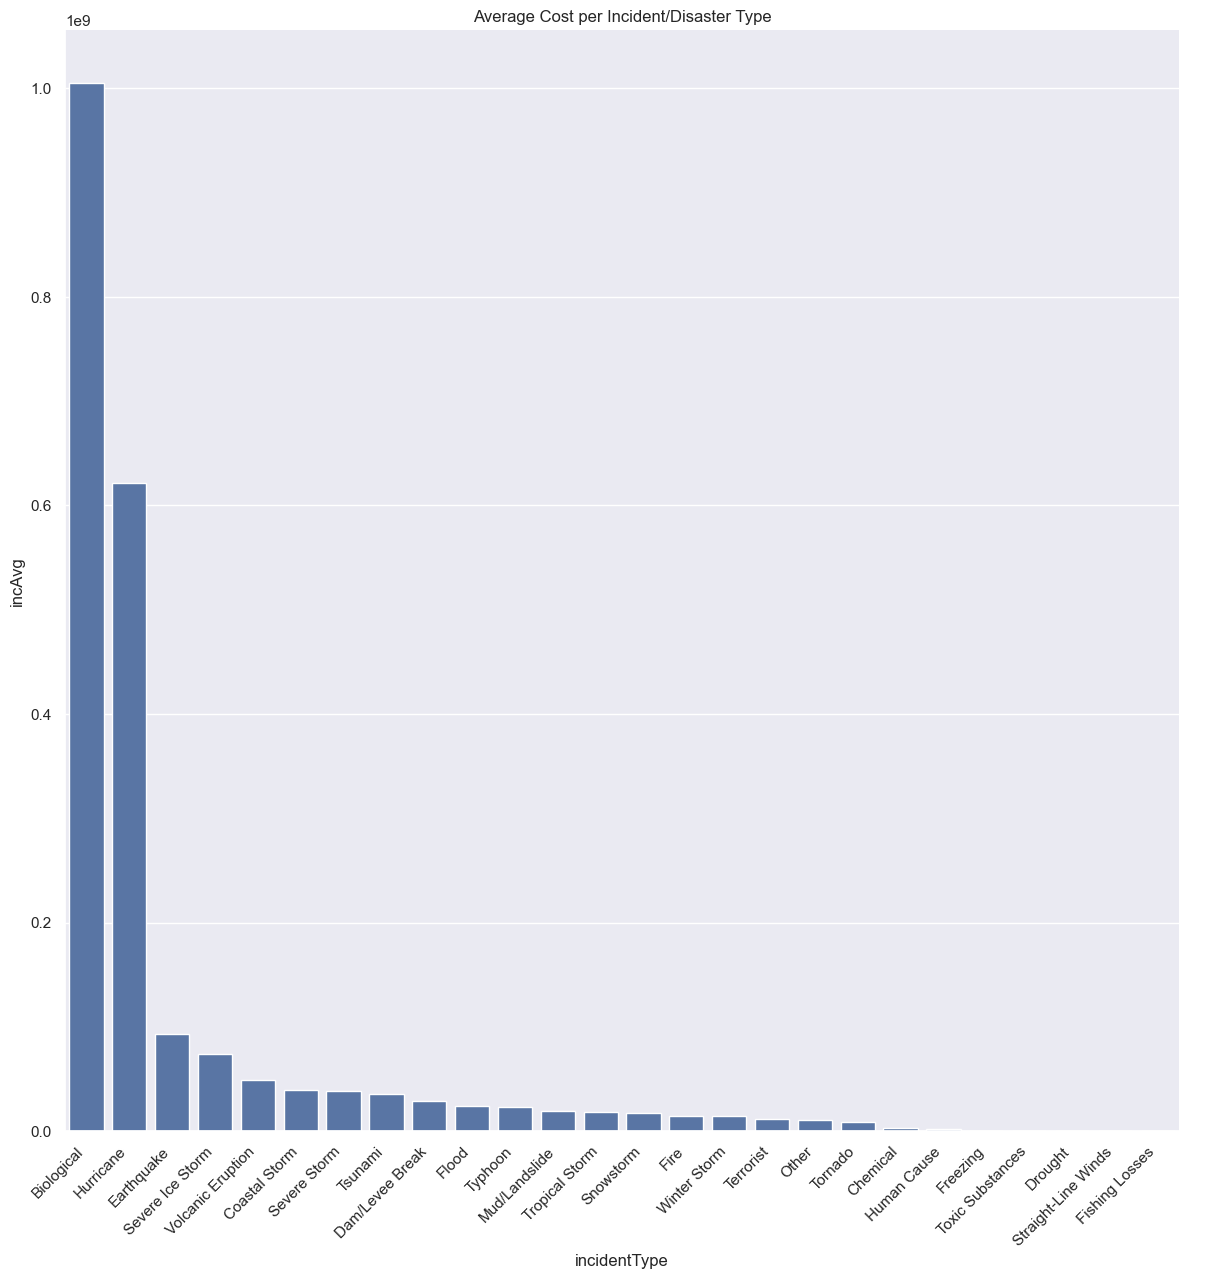

In [28]:
#plot the Incidents based on which is on average most expensive
pOrder = femaDisasterAvgCostDF.sort_values('incAvg', ascending=[False]).index

p5 = sns.catplot(data=femaDisasterAvgCostDF, x=femaDisasterAvgCostDF.index, y='incAvg', height=pHeight, kind=pKind, order=pOrder)

# Rotate X-Axis Labels Diagonally
ax5 = p5.axes.flat[0]
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha="right")

plt.title('Average Cost per Incident/Disaster Type')
plt.show()

C:\Users\MG-Laptop\AppData\Local\Temp\ipykernel_5436\1436881568.py:9: UserWarning: 
The palette list has fewer values (25) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data=femaDisasterIncTypeByRegion, x='region', y='incCount', hue='incidentType', palette=colors, height=pHeight, kind=pKind)


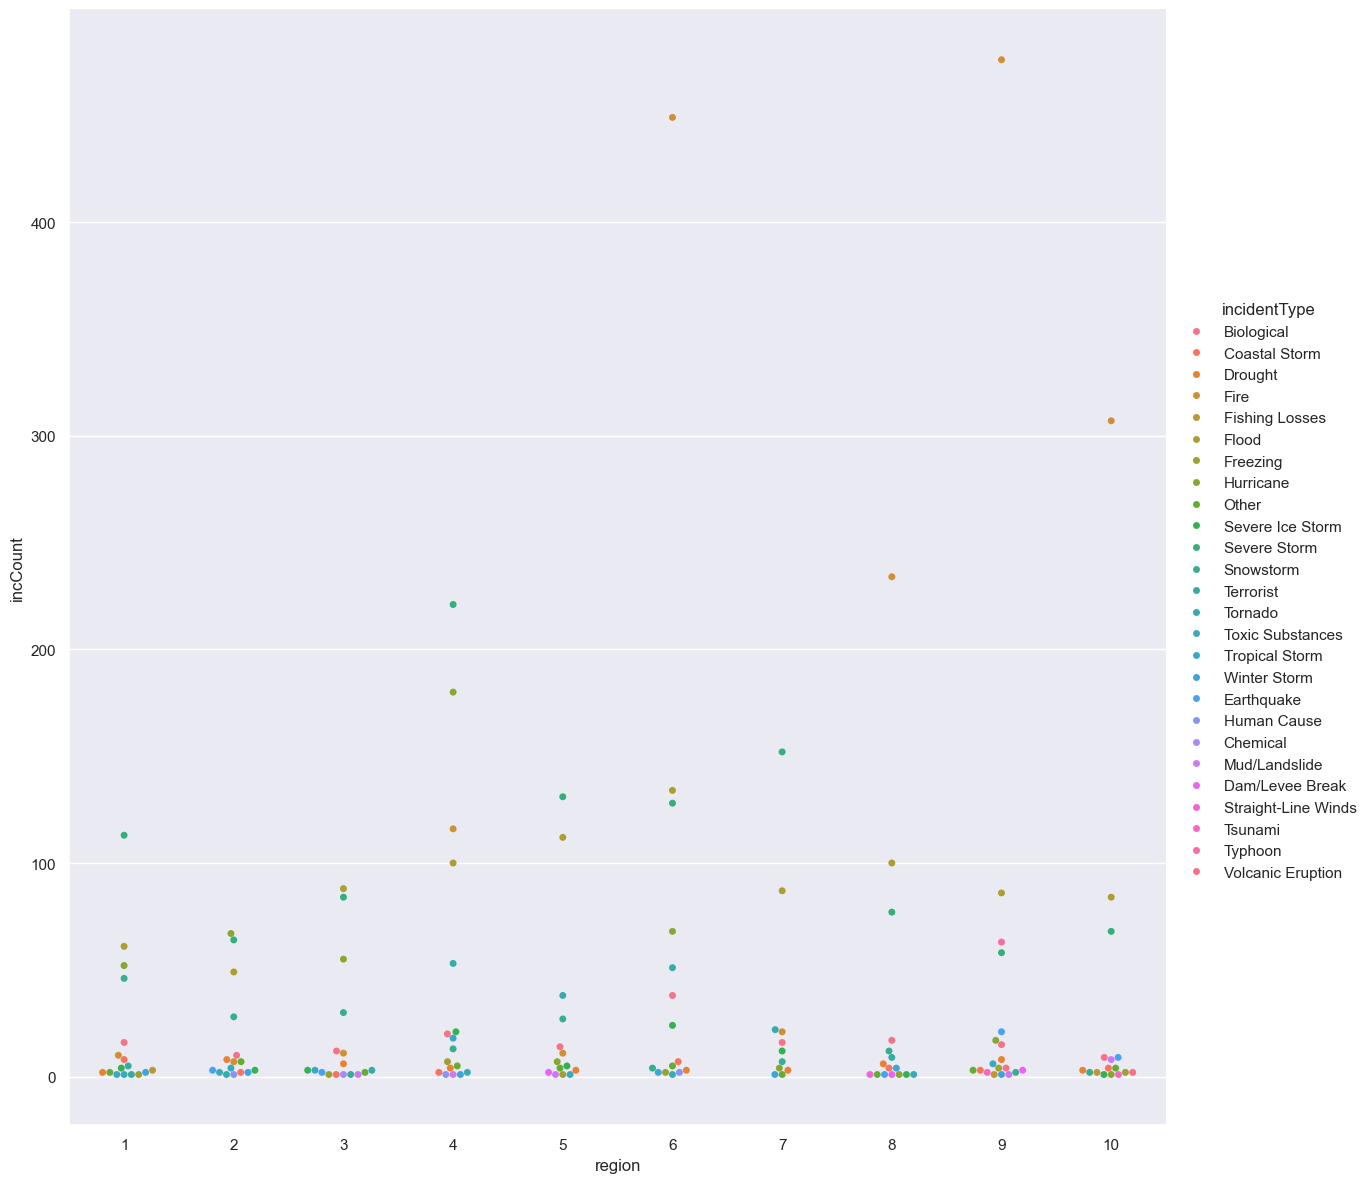

In [29]:
#show the amounts of disasters in each region
pKind = 'swarm' #“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
colors = sns.color_palette('husl', 25)

#create new DF for inc types by region
femaDisasterIncTypeByRegion = femaDataCleanV2[['region', 'incidentType']].groupby(['region', 'incidentType']).agg(incCount=('incidentType', 'count')).reset_index().copy()

#plot the visualization
sns.catplot(data=femaDisasterIncTypeByRegion, x='region', y='incCount', hue='incidentType', palette=colors, height=pHeight, kind=pKind)
plt.show()

#### Feature Selection and Engineering
- target variable: totalDisasterCost 
    - *(a value computed via summing all "totalAmount..."cost fields per given disaster incident row)*
- key categorical variables: incidentType, region, stateCode

In [78]:
# Export latest version of engineered FEMA data
femaDataCleanV2.to_csv(path_or_buf='../data/interim/femaDataCleanV2.csv', index=False)